In [1]:
import json
import pandas as pd
import numpy as np
import re
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from PIL import Image
import wordcloud

In [2]:
with open('trending.json','r',encoding='UTF-8') as load_f:
    load_dict=json.load(load_f)

load_dict=load_dict['collector']

In [16]:
df = pd.DataFrame(columns=load_dict[0].keys())
for dict in load_dict:
    df = df.append(dict, ignore_index=True)


def dict_to_column(df, columns, sort_index):
    for i in df[columns][sort_index].keys():
        df[re.sub('Meta', '', columns) + '_' + i] = [j[i] for j in df[columns]]
    df.drop(columns, axis=1, inplace=True)
    return df


def dict_parse(df):
    for i in df.keys():
        for j in range(len(df[i])):
            if type(df[i].iloc[j]) == type({}) and df[i].iloc[j] != {}:
                df = dict_to_column(df, i, j)
                break
            else:
                None
    return df


df = dict_parse(df)
df['createTime'] = [
    time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(i)))
    for i in df['createTime']
]
for column in [
        'diggCount', 'shareCount', 'playCount', 'commentCount', 'video_height',
        'video_width', 'video_duration'
]:
    df[column] = pd.to_numeric(df[column])
df.head(3)

,id,text,createTime,webVideoUrl,videoUrl,videoUrlNoWaterMark,diggCount,shareCount,playCount,commentCount,...,music_playUrl,music_coverThumb,music_coverMedium,music_coverLarge,covers_default,covers_origin,covers_dynamic,video_height,video_width,video_duration
0,6907228749016714497,Confidence went 📈,2020-12-17 14:15:17,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,3710,50,44800,68,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,1024,576,15
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,2020-09-23 01:09:23,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,55700,1817,838100,936,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://p16-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p77-sign-sg.tiktokcdn.com/musically-ma...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,1024,576,11
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,2020-11-24 14:37:05,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,936200,21100,15300000,27100,...,https://sf16-sg.tiktokcdn.com/obj/tos-alisg-v-...,https://p77-sg.tiktokcdn.com/aweme/100x100/tos...,https://p77-sg.tiktokcdn.com/aweme/200x200/tos...,https://p77-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,960,540,19


In [17]:
df_hashtag = pd.DataFrame(columns=df['hashtags'].iloc[2][0].keys())
tiktok_id = []
author_name = []
playCount = []
hashtag_content = []
for i in list(zip(df['id'], df['author_name'], df['playCount'],
                  df['hashtags'])):
    if len(i[3]) > 0:
        for hashtag in i[3]:
            tiktok_id.append(i[0])
            author_name.append(i[1])
            playCount.append(i[2])
            df_hashtag = df_hashtag.append(hashtag, ignore_index=True)

df_hashtag['tiktok_id']=tiktok_id
df_hashtag.set_index('tiktok_id',inplace=True)
df_hashtag['author_name']=author_name
df_hashtag['playCount']=playCount
df_hashtag['playCount_scale']=StandardScaler().fit_transform(df_hashtag[['playCount']])
df_hashtag['hashtag_count']=df_hashtag.groupby('tiktok_id')['name'].transform('count')
df_hashtag['hashtag_count_scale']=StandardScaler().fit_transform(df_hashtag[['hashtag_count']])
df_hashtag['category_flag']=[1 if i in ['fyp', 'fy', 'foryou', 'foryoupage']  else 0 for i in df_hashtag['name']]
df_hashtag=df_hashtag.sort_values('playCount',ascending=False)
df_hashtag.head()

,id,name,title,cover,author_name,playCount,playCount_scale,hashtag_count,hashtag_count_scale,category_flag
tiktok_id,,,,,,,,,,
6894081763379924229,1677732212525058,timewarpscan,It's finally here. Try out our new #TimeWarpSc...,https://p16-sg.tiktokcdn.com/obj/musically-mal...,billieeilish,250800000,54.659088,1,-2.041882,0
6890571273110392065,2982619,artchallenge,,,condsty,68700000,14.877516,2,-1.758818,0
6890571273110392065,5333,drawing,,,condsty,68700000,14.877516,2,-1.758818,0
6880410980434660610,166389,martialarts,,,lvl.up.martial.arts,50500000,10.901544,5,-0.909627,0
6880410980434660610,671853,selfdefence,,,lvl.up.martial.arts,50500000,10.901544,5,-0.909627,0


In [8]:
df['hashtag_flag']=[1 if len(i)>0 else 0 for i in df['hashtags']]
df['playCount_scale']=StandardScaler().fit_transform(df[['playCount']])
Y=df.iloc[:]['playCount_scale']
X=df.iloc[:][['hashtag_flag']]
X_con=sm.add_constant(X)
# regression=sm.OLS(Y,X_con).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        playCount_scale   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1422
Date:                Mon, 15 Nov 2021   Prob (F-statistic):              0.706
Time:                        23:55:27   Log-Likelihood:                -1418.9
No. Observations:                1000   AIC:                             2842.
Df Residuals:                     998   BIC:                             2852.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0288      0.083      0.348      0.728      -0.133       0.191
hashtag_flag    -0.0337      0.089     -0.377      0.706      -0.209       0.142
==============================================================================
Omnibus:                     2387.511   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14831668.995
Skew:                          22.514   Prob(JB):                         0.00
Kurtosis:                     597.922   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
Y=df_hashtag.iloc[:]['playCount']
X=df_hashtag.iloc[:][['hashtag_count']]
X_con=sm.add_constant(X)
regression=sm.OLS(Y,X_con).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              playCount   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.85
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           5.08e-06
Time:                        01:20:24   Log-Likelihood:                -89297.
No. Observations:                5330   AIC:                         1.786e+05
Df Residuals:                    5328   BIC:                         1.786e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.263e+06   1.58e+05      7.971      0.000    9.52e+05    1.57e+06
hashtag_count -8.089e+04   1.77e+04     -4.566      0.000   -1.16e+05   -4.62e+04
==============================================================================
Omnibus:                    14654.524   Durbin-Watson:                   0.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        647861258.975
Skew:                          34.188   Prob(JB):                         0.00
Kurtosis:                    1709.612   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\manti\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manti\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


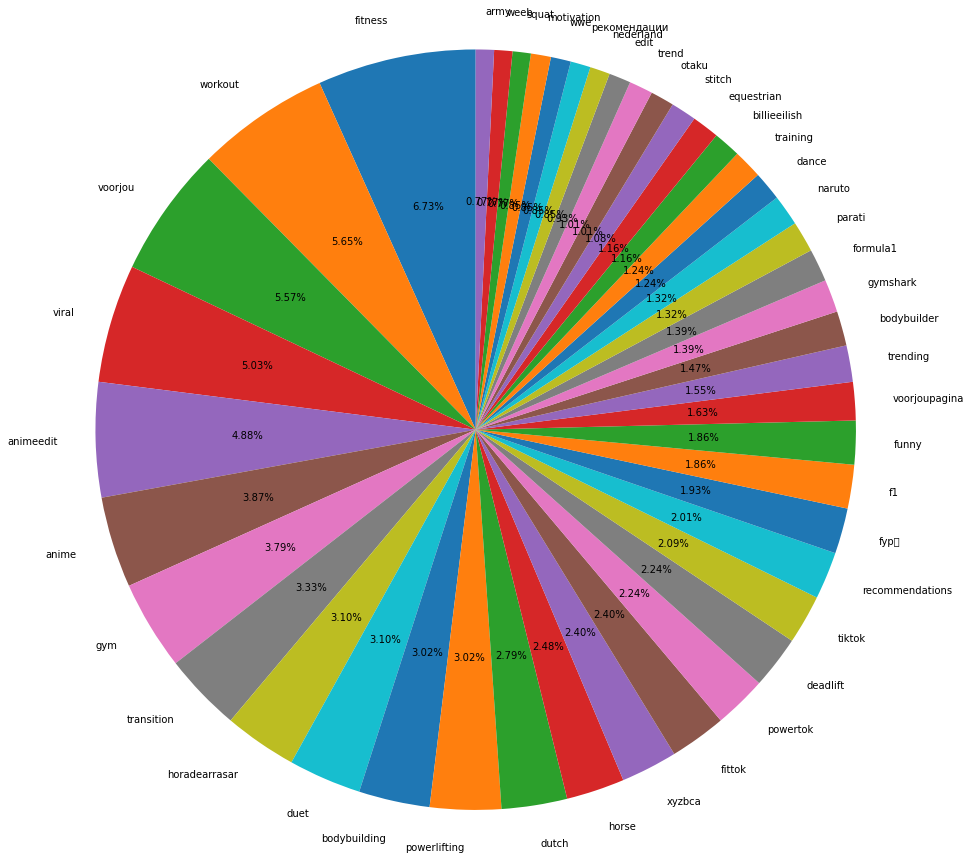

In [10]:
a = df_hashtag['name'].value_counts(ascending=False).to_frame()
a = a[a['name'] >= 10]
b = a[a.index.isin(['fyp', 'fy', 'foryou', 'foryoupage'])==False]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.pie(b['name'][:45], labels=b.index[:45], autopct='%1.2f%%', startangle=90)
ax.axis('equal')
plt.show()
# binary test: whether hashtags exists (not significant); whether fyp matters;
#     correlation between hashtag counts and playcounts √; whether specific category in hashtags helps

C:\Users\manti\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\manti\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


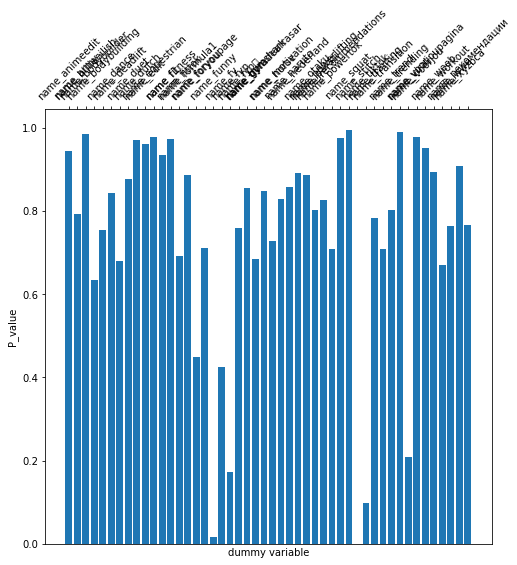

In [43]:
subset_hashtag_name = df_hashtag[df_hashtag['name'].isin(a.index)]
subset_hashtag_name = pd.get_dummies(subset_hashtag_name,
                                     drop_first=True,
                                     columns=['name'])

dummy_column = [
    i for i in subset_hashtag_name.columns if len(re.findall('name_', i)) > 0
]

y = subset_hashtag_name.iloc[:]['playCount']
x = subset_hashtag_name.iloc[:][dummy_column]

x_con = sm.add_constant(x)
regression = sm.OLS(y, x_con).fit()

pvalue = regression.pvalues.tolist()
pvalue.pop(0)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.bar(dummy_column, pvalue)
ax.set_xlabel('dummy variable')
ax.set_ylabel('P_value')
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
# plt.savefig('P_value of dummy variable.png')
plt.show()

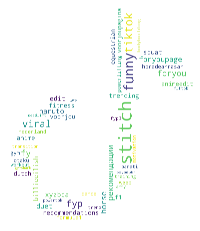

In [19]:
hashtag_popularity = df_hashtag[df_hashtag['name'].isin(
    a.index)].groupby('name')['playCount'].mean().sort_values(
        ascending=False).to_frame()
hashtag_popularity['playCount'] = hashtag_popularity['playCount'] / (10**4)
hashtag_popularity['playCount'] = hashtag_popularity['playCount'].astype('int')
hashtag_popularity.rename(columns={'playCount': 'score'}, inplace=True)

word_frequency = {
    hashtag_popularity.index[i]: hashtag_popularity['score'].iloc[i]
    for i in range(len(hashtag_popularity))
}

backgroud_Image = np.array(Image.open("TikTok Logo.png"))
w = wordcloud.WordCloud(scale=5,
                        width=1024,
                        height=768,
                        mask=backgroud_Image,
                        background_color='white',
                        mode='RGBA',
                        max_words=200).fit_words(word_frequency)

plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

# w.to_file('hashtag_popularity.png')